In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [70]:
# state = np.array([np.pi / 2, 0.0, np.pi / 2, 0.0])
# print(state)


def theta_derivatives(state, L1, L2, m1, m2, g=9.81):
    '''
    Calculates the time derivaties of the state variables of the double pendulum

    Inputs: 
            state = [theta_1, dtheta_1, theta_2, dtheta_2] w/
                theta_1, theta_2 = angle of top, bottom pendulum respectively
                dtheta_1, dtheta_2 = angular velocity of top, bottom pendulum
            L1, L2 = lengths of top and bottom pendulum
            m1, m2 = masses of top and bottom pendulum
            g = gravity
    Outputs: 
            numpy array [dtheta_1, ddottheta_1_dt, dtheta_2, ddottheta2_dt] w/
                dtheta_1, dtheta_2 = angular velocity of top, bottom pendulum
                ddottheta_1_dt, ddottheta_2_dt = angular acceleration of top, bottom pendulum
    '''
    theta_1, dtheta_1, theta_2, dtheta_2 = state
    delta_theta = theta_1 - theta_2
    M = m1 + m2
    alpha = M - m2 * np.cos(delta_theta)**2
    # Equation (6)and (7) from the link
    eq6 = (-m2 * L2 * dtheta_2**2 * np.sin(delta_theta)
            - m2 * L1 * dtheta_1**2 * np.sin(delta_theta) * np.cos(delta_theta)
            - M * g * np.sin(theta_1)
            + m2 * g * np.sin(theta_2) * np.cos(delta_theta))
    ddottheta_1_dt = eq6 / (L1 * alpha)

    eq7 = (+M * L1 * dtheta_1**2 * np.sin(delta_theta)
            + m2 * L2 * dtheta_2**2 * np.sin(delta_theta) * np.cos(delta_theta)
            + M * g * np.sin(theta_1) * np.cos(delta_theta)
            - M * g * np.sin(theta_2))
    ddottheta2_dt = eq7 / (L2 * alpha)

    return np.array([dtheta_1, ddottheta_1_dt, dtheta_2, ddottheta2_dt])

#tracking

# Runge-Kutta from previous project
def rk2_step(state, dt, L1, L2, m1, m2):
    k1 = theta_derivatives(state, L1, L2, m1, m2)
    mid_state = state + 0.5 * dt * k1
    k2 = theta_derivatives(mid_state, L1, L2, m1, m2)
    return state + dt * k2


def double_pendulum(dt, T, d0=0, g=9.81, L1=1.0, L2=2.0, m1=1.0, m2=2.0):
    """
    Runs a full double pendulum simulation and returns the state of the pendulum at each timestep
    
    Inputs: 
            dt = timestep
            T = total runtime of simulation
            d0 = top pendulum's displacement from the horizontal (initial separation vector used for Lyapunov calculation)
            g = gravity (9.8 m/s2)
            L1, L2 = lengths of top and bottom pendulums respectively
            m1, m2 = masses of top and bottom pendulums respectively

    Outputs:
            states = array of angular positions and velocities of each pendulum over each timestep
            theta1_vals / theta2_vals = array of angular positions of each pendulum over each timestep
    """

    
    # Initial conditions: [theta1, dtheta1, theta2, dthate2] the initial condition is both pendulum are lifted with half pi angle
    state = np.array([np.pi / 2 + d0, 0.0, np.pi / 2, 0.0])
    # print(state)
    
    theta_derivatives(state, L1, L2, m1, m2)
    states = [state.copy()]
    t = 0
    while t < T:
        state = rk2_step(state, dt, L1, L2, m1, m2)
        states.append(state.copy())
        t += dt
    
    states = np.array(states)
    theta1_vals = states[:, 0]
    theta2_vals = states[:, 2]
    
    x1 = L1 * np.sin(theta1_vals)
    y1 = -L1 * np.cos(theta1_vals)
    x2 = x1 + L2 * np.sin(theta2_vals)
    y2 = y1 - L2 * np.cos(theta2_vals)
    return states, theta1_vals, theta2_vals, x1, y1, x2, y2






KeyboardInterrupt



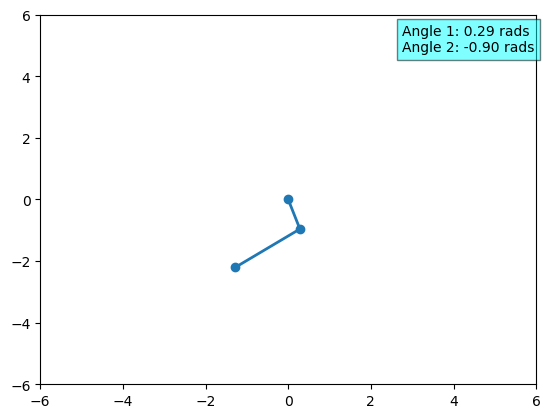

In [67]:
# Creating animation of double pendulum with angle tracking

dt, T, L1, L2 = 0.0001, 20, 1.0, 2.0
states, theta1_vals, theta2_vals, x1, y1, x2, y2 = double_pendulum(dt, T, 0, 9.81, L1, L2, 1.0, 2.0)

fig, ax = plt.subplots()
ax.set_xlim(-2 * (L1 + L2), 2 * (L1 + L2))
ax.set_ylim(-2 * (L1 + L2), 2 * (L1 + L2))
line, = ax.plot([], [], 'o-', lw=2)
angle_text = ax.text(0.73, 0.90, '', transform=ax.transAxes, bbox=dict(facecolor='cyan', alpha=0.5))

def animate(i):
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    angle_text.set_text(
f"""Angle 1: {(theta1_vals[i]):.2f} rads 
Angle 2: {(theta2_vals[i]):.2f} rads""")

    return line, angle_text


writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)

ani = animation.FuncAnimation(fig, animate, frames=len(x1), interval=dt*1000, blit=True).save('pendulum_vid2.mp4', writer='ffmpeg')


plt.title("Double Pendulum (RK2 Simulation)")
plt.show()

In [ ]:
'''** Didn't end up using this in final analysis, but the graph looked interesting so it is in github **'''
# plotting stepsizes

stepsizes = np.arange(0.0001, 0.01, 0.0001)

red_2_blue = 15

for step in stepsizes:
    rgb = np.array([242 - (red_2_blue - 15), 15, red_2_blue]) / 255 # gradient of colors over the different steps

    states, theta1_vals, theta2_vals, _, _, _, _, = double_pendulum(step, 10)
    plt.plot(theta1_vals, theta2_vals, c = rgb, alpha = 0.45, lw = 1.5)
    red_2_blue += 2
    print(f'step {step} plotted')

plt.title("stepsizes")
plt.show()

d0 0.0 plotted
d0 0.001 plotted
d0 0.002 plotted
d0 0.003 plotted
d0 0.004 plotted
d0 0.005 plotted
d0 0.006 plotted
d0 0.007 plotted
d0 0.008 plotted
d0 0.009000000000000001 plotted


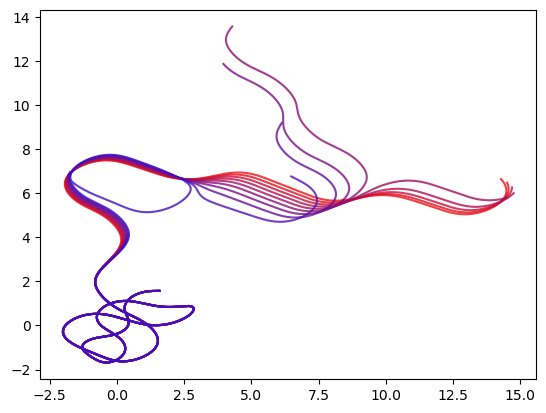

In [132]:
'''** Didn't end up using this in final analysis, but the graph looked interesting so it is in github **'''
# plotting from various starting positions

offsets = np.arange(0, 0.01, 0.001)
red_2_blue = 15

for d0 in offsets:
    rgb = np.array([242 - (red_2_blue - 15), 15, red_2_blue]) / 255
    states, theta1_vals, theta2_vals, _, _, _, _, = double_pendulum(0.001, 10, d0)
    plt.plot(theta1_vals, theta2_vals, c = rgb, alpha = 0.8, lw = 1.5)
    red_2_blue += 20
    print(f'd0 {d0} plotted')

# plt.legend(['Red: 0'], ['Blue: 0.01'])
plt.show()

In [7]:
# plotting whethter the pendulum flips or not based on input values

def flip_check(theta1_0, theta2_0, dt=0.01, g=9.81, L1=1.0, L2=2.0, m1=1.0, m2=2.0):
    """
    Runs the double pendulum simulation until either one of the pendulums flips, and then returns the time it flipped
    Note that there is a semi-aribtrary max time the simulation runs that is proportional to the length of the larger pendulum
    
    Inputs: 
            theta1_0, theta2_0 = the initial angles of the top and bottom pendulums respectively
            
            Defaults from previous setup:
            dt = timestep (0.01)
            g = gravity  (9.81 m/s2)
            L1, L2 = lengths of top and bottom pendulums respectively (1.0m, 2.0m // won't end up impacting the standardized output)
            m1, m2 = masses of top and bottom pendulums respectively (1.0kg, 2.0kg)

    Outputs:
            flip_time = a list with a single element [t, which_pendulum], where:
                t is the time in seconds when the flip happened
                which_pendulum is 1 if the top pendulum flipped, or 2 if the bottom one did
            states = the state history of the system over time.
    """
    # Max simulation times are proportional to the length of the pendulums 
    #(added to stop the simulation from running forever + standardize to different pendulum lengths)
    
    T1 = 1000 * np.sqrt(L1 / g)
    T2 = 1000 * np.sqrt(L2 / g)
    
    # Initial conditions: [theta1, dtheta1, theta2, dthate2] the initial condition is both pendulum are lifted with half pi angle
    state = np.array([theta1_0, 0.0, theta2_0, 0.0])
    # print(state)

    flip_time = []
    
    theta_derivatives(state, L1, L2, m1, m2)
    states = [state.copy()]
    t = 0
    while t < max(T1,T2):
        state = rk2_step(state, dt, L1, L2, m1, m2)
        if (abs(state[0]) < 2 * np.pi) and (abs(state[2]) < 2 * np.pi):
            states.append(state.copy())
            t += dt
        elif abs(state[0]) >= 2 * np.pi:
            flip_time.append([t,1])
            break
        elif abs(state[2]) >= 2 * np.pi:
            flip_time.append([t,2])
            break
        
    states = np.array(states)

    return flip_time, states

In [9]:
def flip_color(flip_times, L1 = 1.0, L2 = 2.0, g = 9.81):
    '''
    Assigns a color to the time each pendulum flipped based on how many multiples of the time reference (sqrt(L1/g)) its flip time is

    Inputs: 
            flip_times = list of lists, where each inner list contains [flip_time, pendulum_number, theta1_0_value, theta2_0_value] w/
                flip_time = the time (in seconds) when a flip occurred; if no flip, it’s 0.0 
                    (achieved by function when_flip further down in the code) 
                pendulum_number = 1 if the top pendulum flipped, 2 if the bottom pendulum flipped, and 0 if no flip occurred
                theta1_0_value, theta_2_0_value = the initial angles of the top and bottom pendulums for that simulation (to be used as plotting coordinates)

            Defaults from previous setup:
            L1, L2 = lengths of top and bottom pendulums respectively (1.0m, 2.0m // won't end up impacting the standardized output)
            g = gravity  (9.81 m/s2)
            m1, m2 = masses of top and bottom pendulums respectively (1.0kg, 2.0kg)

    Outputs:
            black, red, green, blue, gray, white:
            representing double pendulums that flipped within 
            sqrt(L1/g),
            10*sqrt(L1/g), 
            100*sqrt(L1/g), 
            1000*sqrt(L1/g), 
            more than 1000*sqrt(L1/g), 
            and those that didn't flip, respectively
            
            (colors used to represent their literal color on the graph, but now they are simply labels as the graph was redecorated)
    '''


    flip_times = np.array(flip_times)
    
    t1_ratio = np.sqrt(L1 / g)
    t2_ratio = np.sqrt(L2 / g)
    
    t1_time_reference = np.array([t1_ratio, 10 * t1_ratio, 100 * t1_ratio, 1000 * t1_ratio])
    t2_time_reference = np.array([t2_ratio, 10 * t2_ratio, 100 * t2_ratio, 1000 * t2_ratio])
    
    # For top pendulum flips (pendulum 1)
    flipped1 = flip_times[flip_times[:, 1] == 1][:, [0, 2, 3]]
    
    # For bottom pendulum flips (pendulum 2)
    flipped2 = flip_times[flip_times[:, 1] == 2][:, [0, 2, 3]]
    
    # For no flip (pendulum 0)
    no_flip = flip_times[flip_times[:, 1] == 0][:, [0, 2, 3]]
    
    # Filter based on time references (t1_time_reference and t2_time_reference)
    # Black: Values less than or equal to the first time reference
    black = np.vstack([
        flipped1[flipped1[:, 0] <= t1_time_reference[0], 1:3],  # Top flips before or at the first time reference
        flipped2[flipped2[:, 0] <= t2_time_reference[0], 1:3]   # Bottom flips before or at the first time reference
    ])
    
    # Red: Values greater than black and less than or equal to the next time reference
    red = np.vstack([
        flipped1[(flipped1[:, 0] > t1_time_reference[0]) & (flipped1[:, 0] <= t1_time_reference[1]), 1:3],  # Top flips between the first and second time reference
        flipped2[(flipped2[:, 0] > t2_time_reference[0]) & (flipped2[:, 0] <= t2_time_reference[1]), 1:3]   # Bottom flips between the first and second time reference
    ])
    
    # Green: Values greater than red and less than or equal to the next time reference
    green = np.vstack([
        flipped1[(flipped1[:, 0] > t1_time_reference[1]) & (flipped1[:, 0] <= t1_time_reference[2]), 1:3],  # Top flips between the second and third time reference
        flipped2[(flipped2[:, 0] > t2_time_reference[1]) & (flipped2[:, 0] <= t2_time_reference[2]), 1:3]   # Bottom flips between the second and third time reference
    ])
    
    # Blue: Values greater than green and less than or equal to the next time reference
    blue = np.vstack([
        flipped1[(flipped1[:, 0] > t1_time_reference[2]) & (flipped1[:, 0] <= t1_time_reference[3]), 1:3],  # Top flips between the third and fourth time reference
        flipped2[(flipped2[:, 0] > t2_time_reference[2]) & (flipped2[:, 0] <= t2_time_reference[3]), 1:3]   # Bottom flips between the third and fourth time reference
    ])
    
    # White: Values greater than the last time reference (uncapped)
    gray = np.vstack([
        flipped1[flipped1[:, 0] > t1_time_reference[3], 1:3],  # Top flips after the fourth time reference
        flipped2[flipped2[:, 0] > t2_time_reference[3], 1:3]   # Bottom flips after the fourth time reference
    ])

    # White: Values that didn't flip
    white = np.vstack([
        no_flip[:, 1:3]  
    ])
    
    # Print results for debugging
    print(f"flipped1 {flipped1}")
    print(f"flipped2 {flipped2}")
    print(f"no flip {no_flip}")
    print(f"black {black}")
    print(f"red {red}")
    print(f"green {green}")
    print(f"blue {blue}")
    print(f"gray {gray}")
    print(f"white {white}")
    
    return black, red, green, blue, gray, white

Starting i = -1.2500
flip_check took 0.1175s for (i=-1.2500, j=2.3000)
flip_check took 0.0942s for (i=-1.2500, j=2.3100)
flip_check took 0.0370s for (i=-1.2500, j=2.3200)
flip_check took 0.0259s for (i=-1.2500, j=2.3300)
flip_check took 0.0315s for (i=-1.2500, j=2.3400)
flip_check took 0.0341s for (i=-1.2500, j=2.3500)
flip_check took 0.0432s for (i=-1.2500, j=2.3600)
flip_check took 0.0398s for (i=-1.2500, j=2.3700)
flip_check took 0.0785s for (i=-1.2500, j=2.3800)
flip_check took 6.0294s for (i=-1.2500, j=2.3900)
flip_check took 0.0855s for (i=-1.2500, j=2.4000)
flip_check took 5.8452s for (i=-1.2500, j=2.4100)
flip_check took 0.1009s for (i=-1.2500, j=2.4200)
flip_check took 0.0737s for (i=-1.2500, j=2.4300)
flip_check took 0.0594s for (i=-1.2500, j=2.4400)
flip_check took 0.0692s for (i=-1.2500, j=2.4500)
flip_check took 0.0820s for (i=-1.2500, j=2.4600)
flip_check took 0.0507s for (i=-1.2500, j=2.4700)
flip_check took 0.0719s for (i=-1.2500, j=2.4800)
flip_check took 0.0902s for (

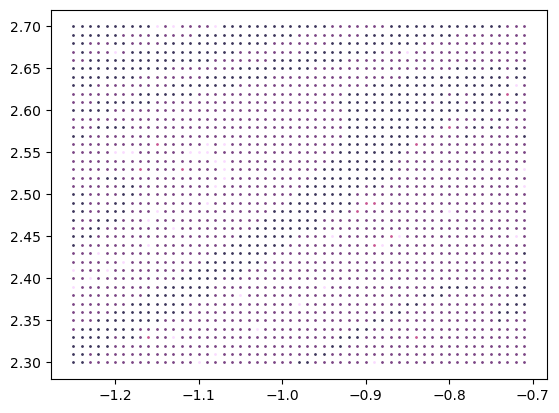

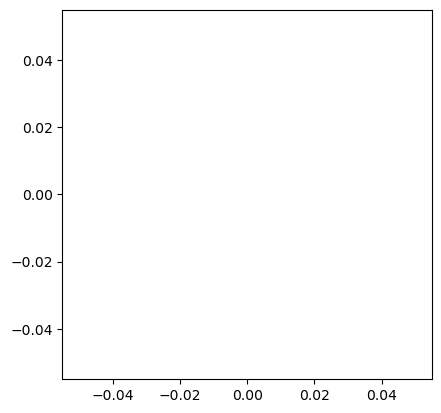

<Figure size 500x500 with 0 Axes>

In [13]:
theta1_inputs = np.arange(-1.25, -0.7, 0.01)
theta2_inputs = np.arange(2.3, 2.7, 0.01)


def when_flip(theta1_0, theta2_0):
    
    flip_times = []
    
    for i in theta1_0:
        print(f'Starting i = {i:.4f}')
        for j in theta2_0:
            start = time.time()
            flip_time, states = flip_check(i, j)
            print(f"flip_check took {time.time() - start:.4f}s for (i={i:.4f}, j={j:.4f})")
            
            if flip_time:
                flip_times.append([flip_time[0][0], flip_time[0][1], i, j])  # [time, pendulum #, theta1_0, theta2_0]
            else:
                flip_times.append([0.0, 0, i, j])  # [time=0, no flip, theta1_0, theta2_0]
    
    print('Finished calculating')
    
    black, red, green, blue, gray, white = flip_color(flip_times)
    
    # plotting black
    plt.scatter(black[:,0], black[:,1], c = 'black', s = 1)
    # plotting red
    plt.scatter(red[:,0], red[:,1], c = '#3d365c', s = 1)
    # plotting green
    plt.scatter(green[:,0], green[:,1], c = '#7c4585', s = 1)
    # plotting blue
    plt.scatter(blue[:,0], blue[:,1], c = '#c95792', s = 1)
    # plotting gray
    plt.scatter(gray[:,0], gray[:,1], c = '#ffa200', s = 1)
    # plotting white
    plt.scatter(white[:,0], white[:,1], c = '#fadbff', s = 1)
    
    plt.axis('scaled')
    plt.figure(figsize=(5, 5))
    plt.savefig('flip_graph_zoomed.png')
    plt.draw()
    return flip_times, black, red, green, blue, gray, white

flip_times, black, red, green, blue, gray, white = when_flip(theta1_inputs, theta2_inputs)

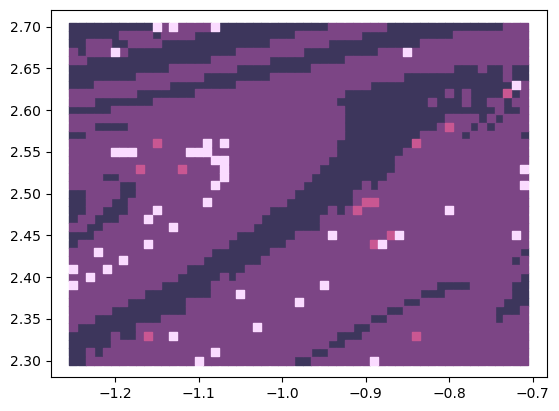

<Figure size 500x500 with 0 Axes>

In [33]:
# flip_times_store = flip_times_ul.copy()
# # print(f'flip times {flip_times_store}')
# flip_times_store = np.array(flip_times_store)

# black, red, green, blue, gray, white = flip_color(flip_times)
# plotting black
plt.scatter(black[:,0], black[:,1], c = 'black', s = 30, marker = 's')
# plotting red
plt.scatter(red[:,0], red[:,1], c = '#3d365c', s = 30, marker = 's')
# plotting green
plt.scatter(green[:,0], green[:,1], c = '#7c4585', s = 30, marker = 's')
# plotting blue
plt.scatter(blue[:,0], blue[:,1], c = '#c95792', s = 30, marker = 's')
# plotting gray
plt.scatter(gray[:,0], gray[:,1], c = '#ffa200', s = 30, marker = 's')
# plotting white
plt.scatter(white[:,0], white[:,1], c = '#fadbff', s = 30, marker = 's')
plt.axis('scaled')
plt.figure(figsize=(5, 5))
plt.savefig('flip_graph_lr.png')
plt.draw()

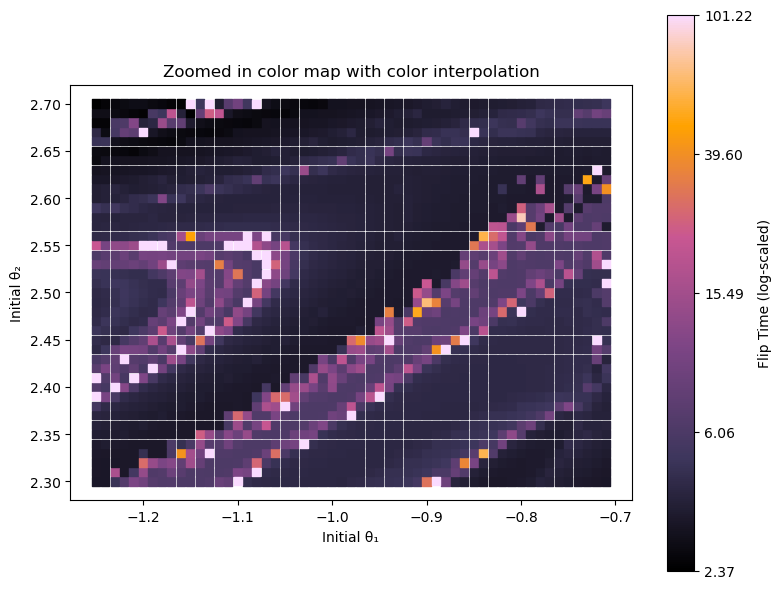

In [61]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib as mpl

# convert to array
flip_times = np.array(flip_times)

# extract time, theta1_0, theta2_0
times = flip_times[:, 0]
theta1_0_vals = flip_times[:, 2]
theta2_0_vals = flip_times[:, 3]

# define color gradient
colors = ['#000000', '#3d365c', '#7c4585', '#c95792', '#ffa200', '#fadbff']
custom_cmap = LinearSegmentedColormap.from_list("flip_colormap", colors)

# handle masks
flip_mask = times > 0
no_flip_mask = times == 0

# apply log-scaling to flip times for normalization 
epsilon = 1e-3 # to avoid log(0)
log_times = np.log10(times[flip_mask] + epsilon)

# normalize to 0-1 based on log scale
min_log = np.min(log_times)
max_log = np.max(log_times)
norm_log_times = (log_times - min_log) / (max_log - min_log)

plt.figure(figsize=(8, 6))

# flips with log-scaled color
sc = plt.scatter(theta1_0_vals[flip_mask], theta2_vals[flip_mask], c=norm_log_times, cmap=custom_cmap, s=35, marker = 's')

# non-flipping as white
plt.scatter(theta1_0_vals[no_flip_mask], theta2_vals[no_flip_mask], c='#fadbff', s=35, marker = 's')

norm = mpl.colors.Normalize(vmin=np.min(times[flip_mask]), vmax=np.max(times[flip_mask]))
cbar = plt.colorbar(sc, ticks=[0, 0.25, 0.5, 0.75, 1])
tick_labels = np.logspace(min_log, max_log, num=5, base=10)
cbar.ax.set_yticklabels([f"{t:.2f}" for t in tick_labels])
cbar.set_label("Flip Time (log-scaled)", fontsize=10)

plt.xlabel("Initial θ₁")
plt.ylabel("Initial θ₂")
plt.axis('scaled')
plt.title("Zoomed in color map with color interpolation")
plt.grid(False)
plt.tight_layout()
plt.show()


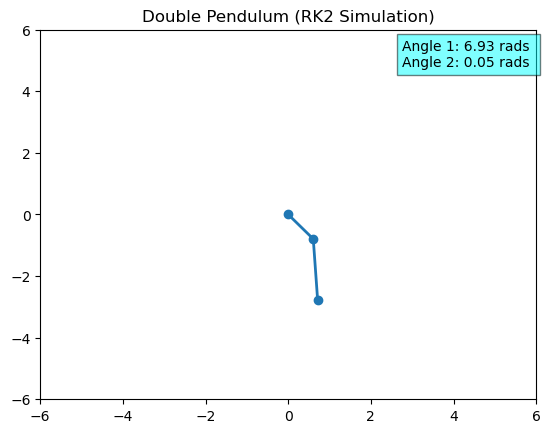

In [111]:
# Animation
'''Values '''

fig, ax = plt.subplots()
ax.set_xlim(-2 * (L1 + L2), 2 * (L1 + L2))
ax.set_ylim(-2 * (L1 + L2), 2 * (L1 + L2))
line, = ax.plot([], [], 'o-', lw=2)
angle_text = ax.text(0.73, 0.90, '', transform=ax.transAxes, bbox=dict(facecolor='cyan', alpha=0.5))

def animate(i):
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    angle_text.set_text(
f"""Angle 1: {(theta1_vals[i]):.2f} rads 
Angle 2: {(theta2_vals[i]):.2f} rads""")

    return line, angle_text


writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)

ani = animation.FuncAnimation(fig, animate, frames=len(x1), interval=dt*1000, blit=True).save('pendulum_vid1.mp4', writer='ffmpeg')


plt.title("Double Pendulum (RK2 Simulation)")
plt.show()

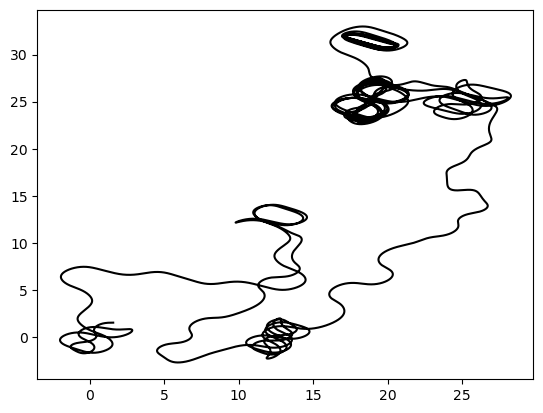

In [66]:
# color = np.array(['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink'])
# color_tile = np.tile(color, int(np.ceil(len(theta1_vals) / len(color))))
# colors = np.delete(color_tile, np.arange(len(theta1_vals), len(color_tile), 1))


# plt.plot(theta1_vals % 2*np.pi, theta2_vals % 2*np.pi, c = 'red', label = 'mod 2pi')
plt.plot(theta1_vals, theta2_vals, c = 'black', label = 'no mod')

# for fun
# color = np.array(['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink'])
# color_tile = np.tile(color, int(np.ceil(len(theta1_vals) / len(color))))
# colors = np.delete(color_tile, np.arange(len(theta1_vals), len(color_tile), 1))
# plt.scatter(theta1_vals, theta2_vals, c = colors, label = 'angle1 vs angle 2 but rainbow')
# plt.plot(np.unwrap(theta1_vals), np.unwrap(theta2_vals), c = 'yellow', label = 'unwrap')

# plt.legend()
plt.show()